In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [4]:
df1=pd.read_csv('ai4i2020.csv',index_col='UDI')

In [5]:
df1.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Source of Data:
https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset


In [6]:
x=type(df1[list(df1)[0]].unique())

In [7]:
len(list(df1[list(df1)[0]].unique()))

10000

In [8]:
df1.drop('Process temperature [K]', axis=1, inplace= True)
df1.drop('Rotational speed [rpm]', axis=1, inplace= True)
df1.drop('Product ID', axis=1, inplace= True)

In [9]:
def convert_to_num(data_frame):
    """returns a dictinary for evenly 
    weighted categorial to numerical conversion"""
    
    dict1={}
    for col in df1[list(df1)]: #for columns in data frame that have text, convert to numerical 
        if df1.dtypes[col]=='object':
            how_long=len(df1[col].unique())
            for count,value in enumerate(df1[col].unique()):
                dict1[value]=count
    return dict1
            
    

In [10]:
df1.dtypes['Type']

dtype('O')

In [11]:
df1['Type'].unique()[0]

'M'

A dictionary to track categorical conversions

In [12]:
print(convert_to_num(df1))

{'M': 0, 'L': 1, 'H': 2}


In [13]:
df2=df1.replace(convert_to_num(df1))

In [14]:
pd.set_option('display.max_rows',df2.shape[0]+1)
df2.head(5)

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
1,0,298.1,42.8,0,0,0,0,0,0,0
2,1,298.2,46.3,3,0,0,0,0,0,0
3,1,298.1,49.4,5,0,0,0,0,0,0
4,1,298.2,39.5,7,0,0,0,0,0,0
5,1,298.2,40.0,9,0,0,0,0,0,0


In [15]:
df_L = df2[df2.Type==1].sort_values(by='Tool wear [min]')

In [16]:
def feature_dist(data_F):
    """ shows the distribution of each feature"""
    for count,col in enumerate(data_F):
        data_F.hist(column = list(data_F)[count], bins=int(10000**.5))

In [17]:
x=df_L[list(df_L)[1:4]]

In [18]:
y = df_L[list(df_L)[5]]

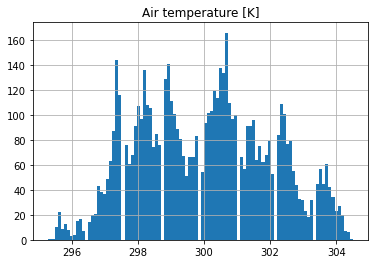

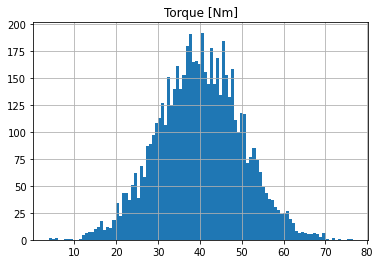

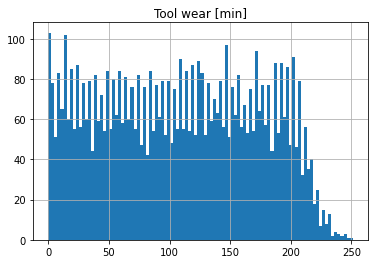

In [19]:
feature_dist(x)

Reliability

for machine L 

In [20]:
Failure_rate_L = df_L['Machine failure'].sum()/(251*df_L['Type'].count()) * 60
Failure_rate_L

0.009362549800796812

In [21]:
import itertools
from itertools import accumulate
import operator
itertools.accumulate(df_L['Machine failure'])

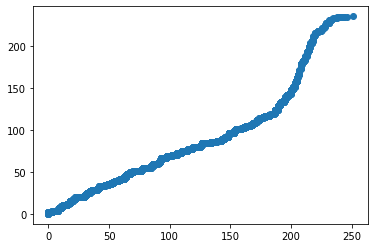

In [24]:

plt.scatter(df_L['Tool wear [min]'],list(accumulate(list(df_L['Machine failure']))))
#plt.xlabel(list(dataF)[x_col])
    
plt.show()

In [32]:
df_L['Machine_failures']=df_L['Machine failure'] 

In [33]:
df_L_F=df_L[df_L.Machine_failures==1]

In [34]:
df_L_F.head()

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Machine_failures
UDI,,,,,,,,,,,
5491,1,302.6,68.5,0,1,0,0,1,0,0,1
9176,1,297.8,64.2,0,1,0,0,1,0,0,1
7764,1,300.4,76.6,3,1,0,0,1,0,0,1
4989,1,303.8,13.0,5,1,0,0,1,0,0,1
4212,1,302.1,52.8,8,1,0,1,0,0,0,1


In [35]:
my_list=list(accumulate(list(df_L_F['Machine failure'])))

In [36]:
type(my_list)

list

In [37]:
df_L_F['Accum_Failures']=my_list

<ipython-input-37-fd96df9256b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L_F['Accum_Failures']=my_list


In [39]:
df_L_F['percent_failures'] = df_L_F['Accum_Failures'] / df_L_F['Machine_failures'].sum()

<ipython-input-39-f573717e7b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L_F['percent_failures'] = df_L_F['Accum_Failures'] / df_L_F['Machine_failures'].sum()


In [40]:
df_L_F.head()

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Machine_failures,Accum_Failures,percent_failures
UDI,,,,,,,,,,,,,
5491,1,302.6,68.5,0,1,0,0,1,0,0,1,1,0.004255
9176,1,297.8,64.2,0,1,0,0,1,0,0,1,2,0.008511
7764,1,300.4,76.6,3,1,0,0,1,0,0,1,3,0.012766
4989,1,303.8,13.0,5,1,0,0,1,0,0,1,4,0.017021
4212,1,302.1,52.8,8,1,0,1,0,0,0,1,5,0.021277


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8C7C151F0>]],
      dtype=object)

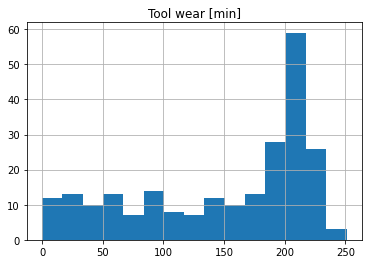

In [294]:
df_L_F.hist(column = 'Tool wear [min]', bins=int(235**.5))

In [42]:
from scipy.stats import exponweib
exponential_paramter,shape,location,scale = exponweib.fit(df_L_F['Tool wear [min]'])

In [43]:
exponential_paramter,shape,location,scale

(0.07087335881996223,
 25.558472395191288,
 -19.148694671291835,
 249.55520747185034)

In [44]:
y_weibull_2 = exponweib.cdf(df_L_F['Tool wear [min]'],exponential_paramter,shape,location,scale)

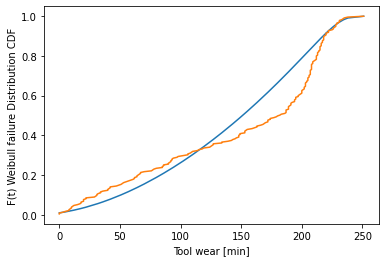

In [45]:
plt.plot(df_L_F['Tool wear [min]'],y_weibull_2)
plt.xlabel('Tool wear [min]')
plt.ylabel("F(t) Weibull failure Distribution CDF")
plt.plot(df_L_F['Tool wear [min]'],df_L_F['percent_failures'])

#plt.xlabel(list(dataF)[x_col])
plt.show()

In [50]:
 exponweib.interval(.64,exponential_paramter,shape,location,scale)

(77.68719383591868, 204.78392778421954)

In [367]:
from statistics import mean,variance,stdev
variance(df_L_F['Tool wear [min]'])
MTBF=mean(df_L_F['Tool wear [min]'])

In [368]:
MTBF

148.88936170212767

In [365]:
variance(df_L_F['Tool wear [min]'])

5248.3979632660485

In [366]:
stdev(df_L_F['Tool wear [min]'])

72.44582778370365

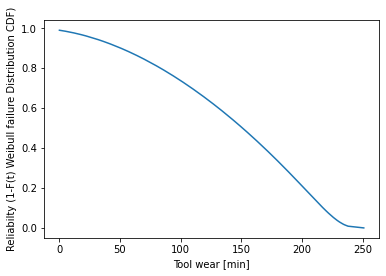

In [432]:
plt.plot(df_L_F['Tool wear [min]'],1-y_weibull_2)
plt.xlabel('Tool wear [min]')
plt.ylabel("Reliabilty (1-F(t) Weibull failure Distribution CDF)")
#plt.plot(df_L_F['Tool wear [min]'],df_L_F['percent_failures'])

#plt.xlabel(list(dataF)[x_col])
plt.show()